# Integração Numérica
## Andre Nepomuceno - UFF

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, dblquad, tplquad, simps
%matplotlib inline

**1. Integral Própria**

In [2]:
f1 = lambda x: 1/x**(2)

In [3]:
quad(f1,a=1,b=4)

(0.7500000000000002, 1.913234548258995e-09)

In [4]:
f2 = lambda x: np.exp(-np.abs(x))*np.sin(x**2)**2

In [5]:
#escolha da tolerância absoluta
quad(f2,-1,2,epsabs=0.1)

(0.29551455828969975, 0.001529571827909423)

In [6]:
quad(f2,-1,2,epsabs=1.49e-8)

(0.29551455505239044, 4.449763316745447e-10)

In [7]:
def f3(x,n,m):
    return np.sin(x)**n*np.cos(x)**m

In [8]:
quad(f3,-np.pi/2,np.pi/2,args=(2,1))

(0.6666666666666666, 1.6257269518146785e-13)

**2. Integral Imprópria**

In [9]:
f4 = lambda x: np.exp(-x**2)
quad(f4,0,np.inf)

(0.8862269254527579, 7.101318390472462e-09)

In [10]:
#resultado analitico
np.sqrt(np.pi)/2

0.8862269254527579

**3. Singularidades**

In [11]:
f5 = lambda x: 1/np.sqrt(np.abs(x))

(0, 18)

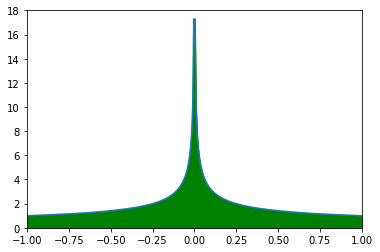

In [12]:
fig,ax= plt.subplots()
x = np.linspace(-1,1,300)
ax.plot(x,f5(x))
ax.fill_between(x,f5(x),color='g')
ax.set_xlim(-1,1)
ax.set_ylim(0,18)

\begin{equation}
I  \,=\, \int_{-1}^{1} \frac{dx}{\sqrt{|x|}} \,=\, 4
\end{equation}

In [13]:
#sem o argumentos points
quad(f5,-1,1)

/home/asevedo/programs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


(inf, inf)

In [14]:
#devemos passar uma lista com os pontos divergentes
quad(f5,-1,1,points=[0,])

(3.9999999999999813, 5.684341886080802e-14)

**4. Intetrais Múltiplas**

In [15]:
f6 = lambda y,x: x**2*y
g = lambda x: 0
h = lambda x: 2

In [16]:
dblquad(f6,1,4,g,h)

(42.00000000000001, 4.662936703425658e-13)

Outro exemplo:
\begin{equation}
I  \,=\, \int_{0}^{1} \int_{g(x)}^{h(x)} e^{-(x^2 + y^2)} \, dy dx
\end{equation}
onde $g(x) = x -1$ e $h(x) = 1 - x$.

In [17]:
f7 = lambda y,x: np.exp(-(x**2+y**2))
g = lambda x: x - 1
h = lambda x: 1-x

In [18]:
dblquad(f7,0,1,g,h)

(0.7320931000008094, 1.6564972931774035e-14)

Integral tripla
\begin{equation}
    V  \,=\, \int_{0}^{2\pi} \int_{0}^{\pi} \int_{0}^{1} r^2 \mathrm{sen}\theta \,dr d\theta d\phi
\nonumber
\end{equation}

In [19]:
def f8(phi,theta,r):
    return r**2*np.sin(theta)
gf = lambda r: 0
hf = lambda r: np.pi
qf = lambda r, theta: 0
rf = lambda r,theta: 2*np.pi

In [20]:
tplquad(f8,0,1,gf,hf,qf,rf)

(4.1887902047863905, 1.389095079694993e-13)

**5. Inegrando Arrays**

In [21]:
x = np.arange(0,10)
y = np.arange(0,10)
print(x)

[0 1 2 3 4 5 6 7 8 9]


In [22]:
simps(y,x)

40.5